- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
- MEDV: median value of owner-occupied homes

In [6]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import string 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

import lr_assumptions as lr


In [2]:
df = pd.read_csv('housing-cleaned.csv')

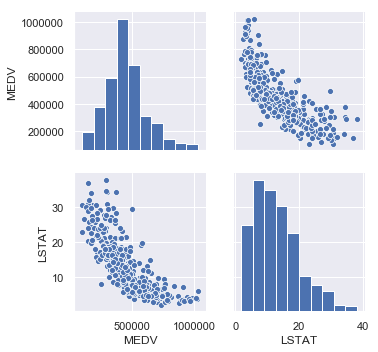

In [14]:
df_ = pd.DataFrame()
df_['MEDV'] = df.MEDV
df_['LSTAT'] = df.LSTAT
sns.pairplot(df_)

- LSTAT seems to have a log relationship with MEDV. We will validate that the assumptions are met.

In [3]:
df['log_LSTAT'] = np.log(df.LSTAT)
X = df[['RM', 'log_LSTAT']]
y = df.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print("explained_variance_score price: {:,.3f}".format(explained_variance_score(y_test, y_pred)))
print('mean_squared_error: {:,.2f}'.format(mean_squared_error(y_test, y_pred)))

explained_variance_score price: 0.766
mean_squared_error: 7,620,266,277.92


('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
('Checking with a scatter plot of actual vs. predicted.', 'Predictions should follow the diagonal line.')


/anaconda2/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


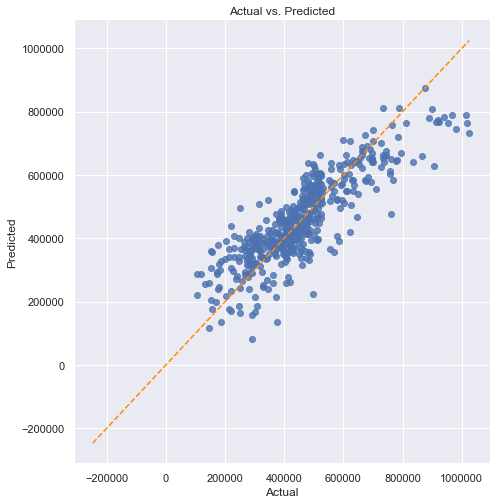

In [7]:
lr.linear_assumption(model, X, y)

##### Predictions follow the diagonal line. But they aren't simetrically distributed, we will continue checking assumptions.

('Assumption 5: Homoscedasticity of Error Terms', '\n')
Residuals should have relative constant variance


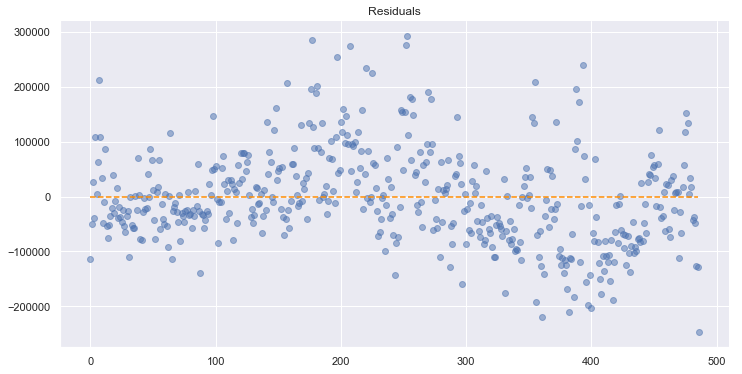

In [8]:
lr.homoscedasticity_assumption(model, X, y)

##### Doesn't have constant variance. 
#### We won't continue with linear analysis.